In [35]:
%pip install pandas

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np

In [2]:
dt = 0.075


pts = lambda t: np.ones(int(t/dt))


# we want 2 sec of 1, 1, 2 sec of 1, -1, 2 sec of -1, -1, 2 sec of -1, 1, 2 sec of 1, 1

# first 2 sec
throttles = np.vstack((pts(3), pts(3)))
# # second 2 sec
throttles_2 = np.vstack((pts(3), -pts(3)))
# # third 2 sec
throttles_3 = np.vstack((-pts(6), -pts(6)))
# # fourth 2 sec
throttles_4 = np.vstack((-pts(12), pts(12)))

throttles_5 = np.vstack((pts(6), pts(6)))

throttles_6 = np.vstack((pts(3), -pts(3)))

throttles = np.hstack((throttles, throttles_2, throttles_3, throttles_4, throttles_5, throttles_6)).T

df = pd.DataFrame(throttles, columns=['throttle_x', 'throttle_y'])


In [4]:
df.to_csv('../traj/trajectories.csv', index=False)

In [4]:
# Sinusoidal trajectory
dt = 0.075

t = np.linspace(0, 2*np.pi, 100)
x = 60*np.sin(t)
y = 60*np.cos(t)

df = pd.DataFrame(np.vstack((x, y)).T, columns=['goal_x', 'goal_y'])
df.to_csv('../traj/way_points_sin.csv', index=False)

In [5]:
x1 = np.ones(90)*-60
y1 = np.linspace(-60, 60, 90)
path = np.vstack((x1, y1)).T

x2 = np.linspace(-60, 60, 90)
y2 = np.ones(90)*60
path = np.vstack((path, np.vstack((x2, y2)).T))

x3 = np.ones(90)*60
y3 = np.linspace(60, -60, 90)
path = np.vstack((path, np.vstack((x3, y3)).T))

x4 = np.linspace(60, -60, 90)
y4 = np.ones(90)*-60
path = np.vstack((path, np.vstack((x4, y4)).T))

df = pd.DataFrame(path, columns=['goal_x', 'goal_y'])
df.to_csv('../traj/way_points_square.csv', index=False)

In [16]:
# Square

dt = 0.075
num_points = int(60/dt)

t = np.linspace(0, 2*np.pi, num_points)
x = np.sign(np.sin(t))
y = np.sign(np.cos(t))

df = pd.DataFrame(np.vstack((x, y)).T, columns=['throttle_x', 'throttle_y'])
df.to_csv('../traj/trajectories_square.csv', index=False)

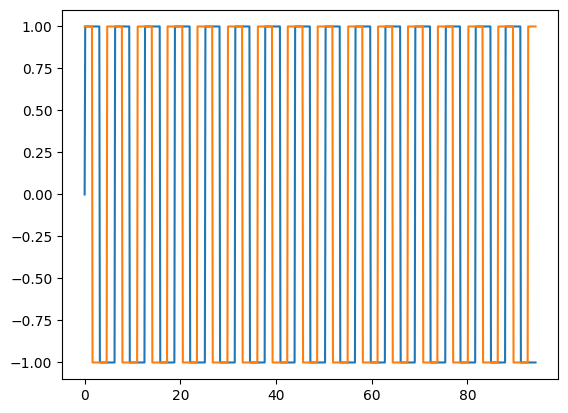

In [12]:
plt.plot(t, x)
plt.plot(t, y)

In [17]:
# Parameters
frequency = 1/60  # frequency of the sawtooth wave in Hz
duration = 60  # duration of the signal in seconds
phase_shift = np.pi / 2  # 90 degrees phase shift in radians

# Time vector
t = np.linspace(0, duration, int(duration/dt), endpoint=False)

# Generate sawtooth wave with phase shift
x = 2 * ((t * frequency) - np.floor(0.5 + t * frequency))
y = 2 * ((t * frequency + phase_shift / (2 * np.pi)) - np.floor(0.5 + t * frequency + phase_shift / (2 * np.pi)))

df = pd.DataFrame(np.vstack((x, y)).T, columns=['throttle_x', 'throttle_y'])
df.to_csv('../traj/trajectories_saw_tooth.csv', index=False)

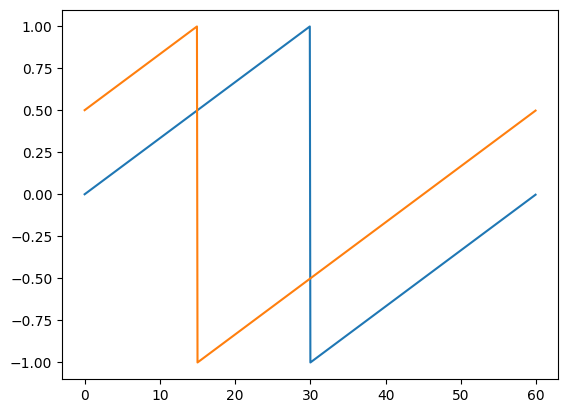

In [18]:
import matplotlib.pyplot as plt
plt.plot(t, x)
plt.plot(t, y)

In [30]:
import matplotlib.pyplot as plt

In [34]:
traj = pd.read_csv('/home/ansue1234/Research/SML/RobLimbFK/ros_ws/src/scripts/trajectory.csv')
traj['goal_x'] = traj['goal_x'] - np.mean(traj['goal_x'])
traj['goal_y'] = traj['goal_y'] - np.mean(traj['goal_y'])
traj['goal_x'] /= np.max(np.abs(traj['goal_x']))
traj['goal_y'] /= np.max(np.abs(traj['goal_y']))
traj['goal_x'] *= 80
traj['goal_y'] *= 80
traj['goal_y'] = -traj['goal_y']

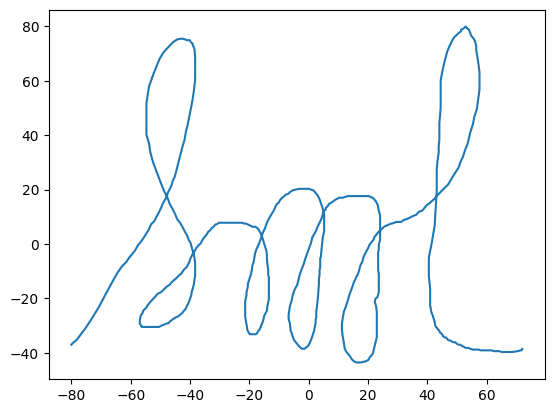

In [35]:
plt.plot(traj['goal_x'], traj['goal_y'])

In [36]:
traj.to_csv('/home/ansue1234/Research/SML/RobLimbFK/ros_ws/src/traj/way_points_traj.csv', index=False)